In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.svm import SVC

In [7]:
import matplotlib.pylab as plt
import numpy as np
import cv2
import os
import glob
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from colormap import rgb2hex
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
from skimage import color

In [29]:
img_dir = "./data_fruits_tarea" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
B,G,R=[],[],[]
im_m=np.zeros((np.shape(files)[0],3))
for i,f1 in enumerate(files):
    img = cv2.imread(f1)
    #b=cv2.split(img)
    R.append(cv2.split(img)[0])
    G.append(cv2.split(img)[1])
    B.append(cv2.split(img)[2])
    im_m[i,0]=np.median(img[:,:,0])   #medianR
    im_m[i,1]=np.median(img[:,:,1])   #medianG
    im_m[i,2]=np.median(img[:,:,2])   #medianB
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(RGB_img)

    

In [19]:
print(np.shape(files),np.shape(files2))

(1300,) (1, 1300)


In [8]:
#Matriz de cuantiles
img_dir = "./data_fruits_tarea" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
im_hsv=np.zeros((len(files),9))
for i,f1 in enumerate(files):
    im = mpimg.imread(f1)
    hsv = color.rgb2hsv(im)
    
    im_h=hsv[:,:,0]
    q_h1=np.quantile(im_h, 0.25)
    q_h2=np.quantile(im_h, 0.5)
    q_h3=np.quantile(im_h, 0.75)
    
    im_s=hsv[:,:,1]
    q_s1=np.quantile(im_s, 0.25)
    q_s2=np.quantile(im_s, 0.5)
    q_s3=np.quantile(im_s, 0.75)
    
    im_v=hsv[:,:,2]
    q_v1=np.quantile(im_v, 0.25)
    q_v2=np.quantile(im_v, 0.5)
    q_v3=np.quantile(im_v, 0.75)
    
    im_hsv[i,0]=q_h1
    im_hsv[i,1]=q_h2
    im_hsv[i,2]=q_h3
    im_hsv[i,3]=q_s1
    im_hsv[i,4]=q_s2
    im_hsv[i,5]=q_s3
    im_hsv[i,6]=q_v1
    im_hsv[i,7]=q_v2
    im_hsv[i,8]=q_v3

In [10]:
import pandas as pd
labels=np.reshape([[0]*100,[1]*100,[2]*100,[3]*100,[4]*100,[5]*100,[6]*100,[7]*100,[8]*100,[9]*100,[10]*100,[11]*100,[12]*100],(1300))
df=pd.DataFrame(np.array([im_hsv[:,0],im_hsv[:,1],im_hsv[:,2],im_hsv[:,3],im_hsv[:,4],im_hsv[:,5],im_hsv[:,6],
                       im_hsv[:,7],im_hsv[:,8],labels.astype(int)]))
df=df.T
df.columns=["q_h1","q_h2","q_h3","q_s1","q_s2","q_s3","q_v1","q_v2","q_v3","labels"]

In [18]:
train=df.sample(n=1000, random_state=1)
test=df.drop(train.index)
x_tra=train[train.columns[0:9]]
y_train=train["labels"]
x_te=train[test.columns[0:9]]
y_te=test["labels"]

# Máquina de soporte vectorial

In [27]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=SVC(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best C:',GS.best_estimator_.C) 
print('Best Kernel:',GS.best_estimator_.kernel)
print('Best Gamma:',GS.best_estimator_.gamma)

C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 1.0
Best C: 10
Best Kernel: rbf
Best Gamma: 10


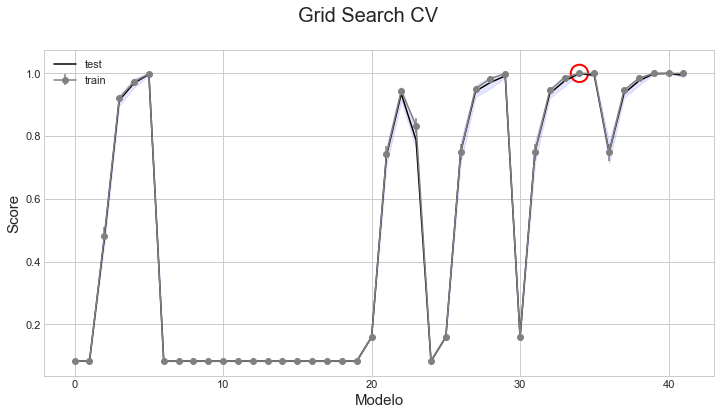

In [28]:
scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']
plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd, alpha=0.1, color='blue')
plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),], s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray', ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best");

# Regresión Logística

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# El grid de parámetros lo definimos como un diccionario
parameters = [
    {'C': [0.01, 0.1, 1, 10, 100], "solver": ["lbfgs","newton-cg","sag","saga"]},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best C:',GS.best_estimator_.C) 
print('Best solver:',GS.best_estimator_.solver)

C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\li

Best score: 0.965
Best C: 100
Best solver: lbfgs


# Árboles de clasificación

In [22]:
from sklearn.tree import DecisionTreeClassifier

# El grid de parámetros lo definimos como un diccionario
parameters = [
    {'max_depth': np.arange(1, 20), 'min_samples_split': [2, 3, 4], "criterion": ["entropy","gini"]}
]

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best depth:',GS.best_estimator_.max_depth)
print('Best samples_split:',GS.best_estimator_.min_samples_split)
print('Best criterion:',GS.best_estimator_.criterion)



C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.994
Best depth: 9
Best samples_split: 2
Best criterion: gini


# Ada boost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


parameters = {'n_estimators': np.arange(1,1000,10)}

DTC = DecisionTreeClassifier(random_state = 42,max_depth=9
                             ,min_samples_split=2,criterion="gini")
ABC = AdaBoostClassifier(base_estimator = DTC)

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=ABC, param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)
print('Best score:', GS.best_score_) 
GS.best_params_

Best score: 0.994


{'n_estimators': 21}

# MLP Classifier

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = {'max_iter': np.arange(1000,2000,200), 
              'alpha': 10.0 ** -np.arange(1, 6),'hidden_layer_sizes':np.arange(10, 15)
             }

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(MLPClassifier(solver='lbfgs',random_state=42), cv=cvfolds, param_grid=parameters, n_jobs=-1)
GS.fit(x_tra,y_train)
print('Best score:', GS.best_score_) 
GS.best_params_

C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.998


{'alpha': 0.001, 'hidden_layer_sizes': 14, 'max_iter': 1000}